<a href="https://colab.research.google.com/github/Chaitu328/AI-ML-Projects/blob/main/Animal_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
!pip install tensorflow tensorflow-hub pandas scikit-learn

In [52]:
# Import necessary libraries
import os
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
import pickle

In [53]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
DATA_DIR = "/content/drive/MyDrive/Animal Classification/dataset"  # Root directory containing animal folders

# Create training and validation datasets
train_dataset = tf.keras.utils.image_dataset_from_directory(
    DATA_DIR,
    validation_split=0.2,  # Adjust split ratio
    subset="training",
    seed=42,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="categorical",  # For one-hot encoded labels
)

val_dataset = tf.keras.utils.image_dataset_from_directory(
    DATA_DIR,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="categorical",
)

Found 1944 files belonging to 15 classes.
Using 1556 files for training.
Found 1944 files belonging to 15 classes.
Using 388 files for validation.


In [54]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip("horizontal"),
  tf.keras.layers.RandomRotation(0.2),
  tf.keras.layers.RandomZoom(0.2),
])

In [55]:
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights="imagenet"
)
base_model.trainable = False  # Freeze base layers

model = tf.keras.Sequential([
  data_augmentation,
  tf.keras.layers.Rescaling(1./127.5, offset=-1),  # MobileNet preprocessing
  base_model,
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(15, activation="softmax")  # 15 animal classes
])

In [56]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10  # Adjust based on performance
)

Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 130s 2s/step - accuracy: 0.2849 - loss: 2.3552 - val_accuracy: 0.8505 - val_loss: 0.7373
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 127s 3s/step - accuracy: 0.8274 - loss: 0.7300 - val_accuracy: 0.9253 - val_loss: 0.4105
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 125s 2s/step - accuracy: 0.8794 - loss: 0.4752 - val_accuracy: 0.9278 - val_loss: 0.3096
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 109s 2s/step - accuracy: 0.9216 - loss: 0.3473 - val_accuracy: 0.9536 - val_loss: 0.2473
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 109s 2s/step - accuracy: 0.9278 - loss: 0.3003 - val_accuracy: 0.9562 - val_loss: 0.2176
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 109s 2s/step - accuracy: 0.9305 - loss: 0.2816 - val_accuracy: 0.9665 - val_loss: 0.1936
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 109s 2s/step - accuracy: 0.9475 - loss: 0.2295 - val_accuracy: 0.9613 - val_loss: 0.1831
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 0.9306 - loss: 0.2493 - val_accuracy: 0.9588 - v

In [57]:
# Evaluate model
test_loss, test_acc = model.evaluate(val_dataset)
print(f"\nTest accuracy: {test_acc:.2%}")
print(f"Test loss: {test_loss:.4f}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.9525 - loss: 0.1742

Test accuracy: 95.88%
Test loss: 0.1588


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step

Classification Report:
              precision    recall  f1-score   support

        Bear       0.87      1.00      0.93        20
        Bird       0.97      0.97      0.97        29
         Cat       0.89      0.94      0.91        17
         Cow       0.96      0.93      0.95        28
        Deer       0.91      0.95      0.93        22
         Dog       0.91      0.91      0.91        23
     Dolphin       1.00      0.96      0.98        28
    Elephant       0.92      1.00      0.96        22
     Giraffe       1.

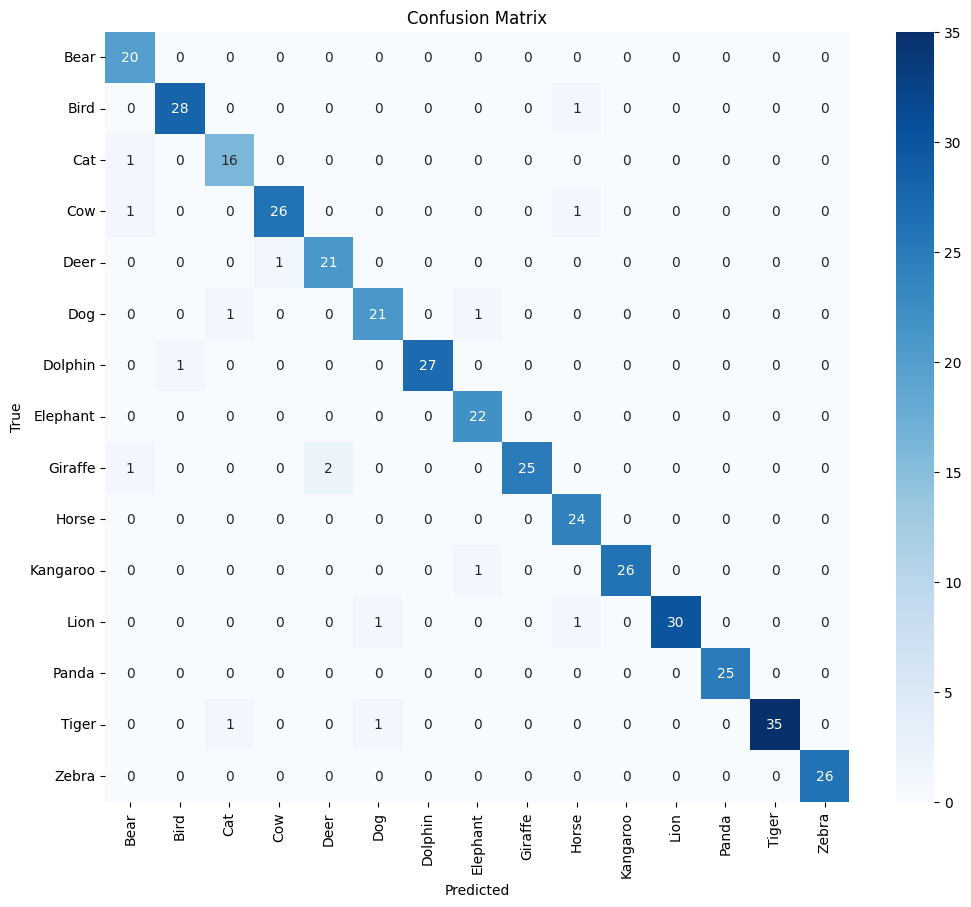

In [58]:
# Get true labels and predictions
y_true = []
y_pred = []

for images, labels in val_dataset:
    y_true.extend(np.argmax(labels.numpy(), axis=1))
    y_pred.extend(np.argmax(model.predict(images), axis=1))

# Classification report
class_names = train_dataset.class_names
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

# Confusion matrix
plt.figure(figsize=(12, 10))
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

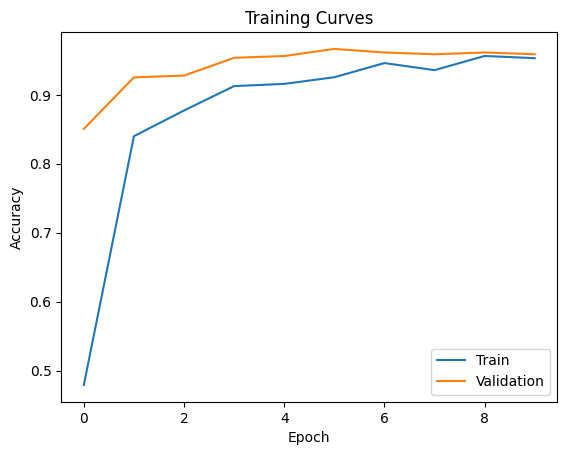

In [59]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Training Curves')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()